In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

1) How do you read the data from stock.csv file using pandas module.

In [23]:
df = pd.read_csv("D:\work\Python\codes\Assignment1\stock1.csv")

In [3]:
df.head(10)
#df.shape

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000
5,2012-01-20,60.042858,75.519997,30.510000,12.64,190.929993,188.520004,26.600000,291.900879,1315.380005
6,2012-01-23,61.058571,75.510002,30.400000,13.14,186.089996,189.979996,26.770000,291.666748,1316.000000
7,2012-01-24,60.058571,75.360001,30.090000,13.16,187.000000,191.929993,27.420000,289.380341,1314.650024
8,2012-01-25,63.808571,75.820000,30.209999,13.11,187.800003,191.729996,27.969999,283.681702,1326.060059
9,2012-01-26,63.518570,75.309998,29.450001,13.05,193.320007,190.979996,28.940001,282.989288,1318.430054


2) Print out the number of stocks.

In [4]:
print(f"NO of stocks: {df['AAPL'].count()*9}")

NO of stocks: 19431


3) Print the name of stocks.

In [5]:
pos = [1,2,3,4,5,6,7,8]
colname = df.columns[pos]
for col in colname:
    print(col)

AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG


4) What is the average return of the S&P500?

In [6]:
avg=df.sp500.mean()
avg

2218.7495540592877

5) Which stock or index has the minimum dispersion from the mean in dollar value?

In [7]:
dis = (df.sp500 - avg).abs()
ab = dis.min()
print(df.index[(df.sp500 - avg).abs() == ab].tolist())

[1226]


6) What is the maximum price for AMZN stock over the specified time period?

In [8]:
df.AMZN.max()

3225.0

7) Check if data contains any null values.

In [9]:
df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

8) Get dataframe information.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


9) Define a function to plot RAW STOCK PRICES (WITHOUT NORMALIZATION/WITHOUT SCALING).

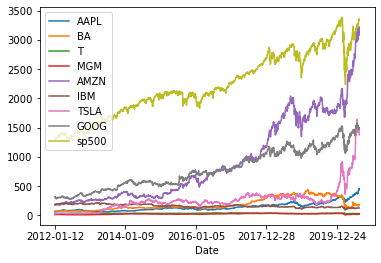

In [19]:
def RAW_STOCK(df):
    df.plot(x="Date", y=["AAPL", "BA", "T", "MGM", "AMZN", "IBM", "TSLA", "GOOG", "sp500"], kind="line")
    plt.show()
    
RAW_STOCK(df)

10) Plot Normalized/Scaled stock prices.

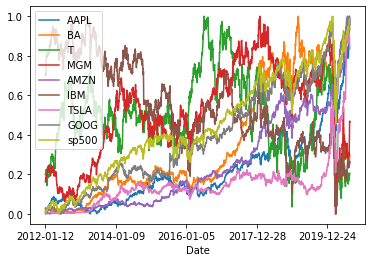

In [24]:
def normalize(df_new):
    column_names_to_normalize = ["AAPL", "BA", "T", "MGM", "AMZN", "IBM", "TSLA", "GOOG", "sp500"]
    x = df_new[column_names_to_normalize].values
    x_scaled = MinMaxScaler().fit_transform(x)
    df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
    df_new[column_names_to_normalize] = df_temp
    


normalize(df)
RAW_STOCK(df)

11) Perform Interactive Data visualization using Plotly.

In [20]:
def pot(df):
    pos = [1,2,3,4,5,6,7,8,9]
    colname = df.columns[pos]
    for col in colname:   
        fig = px.line(df, x="Date", y=col, title='Stock Prices')
        fig.add_scatter
        fig.show()
        
pot(df)

12) SimilarlyPlot normalized stock data in an interactive way.

In [22]:
def pot(df):
    pos = [1,2,3,4,5,6,7,8,9]
    colname = df.columns[pos]
    for col in colname:   
        fig = px.line(df, x="Date", y=col, title='Stock Prices')
        fig.add_scatter
        fig.show()
        
pot(df)

14) Calculate the daily return for S&P 500.

In [15]:
df_sp = df['sp500']
for i in df_sp[1:]:
    df_sp_return[i] = ((df_sp[i]- df_sp[i-1])/df_sp[i-1]) * 100
    
df_sp_return

KeyError: 0.0052416276750753